In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd

In [86]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [87]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [88]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [89]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [90]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [91]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [92]:
measurement

sqlalchemy.ext.automap.measurement

In [93]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year=session.query(measurement.date).order_by(measurement.date.desc()).first()
for x in last_year:
    split_date=x.split('-')
split_date
last_year=int(split_date[0])
last_month=int(split_date[1])
last_day=int(split_date[2])

query_date=dt.date(last_year, last_month, last_day)-dt.timedelta(days=365)

last_year_preci=session.query(measurement.date, measurement.prcp).filter(measurement.date>=query_date)
last_year_preci

In [113]:
# Calculate the date 1 year ago from the last data point in the database
query_date=dt.date(last_year, last_month, last_day)-dt.timedelta(days=365)

In [114]:
# Perform a query to retrieve the data and precipitation scores
last_preci=session.query(measurement.date, measurement.prcp).filter(measurement.date>=query_date)
conn = engine.connect()
last_preci.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x1e0f2dd44c0>,
 '_polymorphic_adapters': {},
 '_entities': [<sqlalchemy.orm.query._ColumnEntity at 0x1e0f296fc40>,
 '_primary_entity': None,
 '_has_mapper_entities': False,
 '_mapper_adapter_map': {<Mapper at 0x1e0f2dd4b50; measurement>: (<Mapper at 0x1e0f2dd4b50; measurement>,
   None)},
 '_criterion': <sqlalchemy.sql.elements.BinaryExpression object at 0x000001E0F296FD00>}

In [120]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(last_preci, columns=['date','precipitation'])
data.dropna()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [128]:
# Sort the dataframe by date, already sorted by date 
type(data['precipitation'])

pandas.core.series.Series

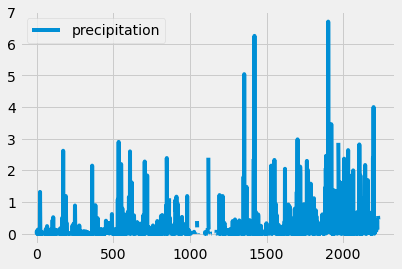

In [131]:
# Use Pandas Plotting with Matplotlib to plot the data
data.plot()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [150]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(station).count()
total_stations

9

In [168]:
# What are the most active stations? (i.e. what stations have the most rows)?

active_station=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
# List the stations and the counts in descending order
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [203]:
low_high_avg_temp=session.query(measurement.station, func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)). \
order_by(func.count(measurement.station).desc()).first()
low_high_avg_temp

('USC00519397', 53.0, 87.0, 73.09795396419437)

In [204]:
# ignore this code
#Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# lowest_temp=session.query(measurement.station, measurement.tobs). \
#                          order_by(func.count(measurement.station).desc()).first()
# for x in lowest_temp:
#     print(x)
# # highest_temp=session.query(measurement.station, func.(measurement.tobs))
# for x in highest_temp:
#     print(x)
# avg_temp=(

In [221]:
# Choose the station with the highest number of temperature observations.
temp_obs=session.query(measurement.date, measurement.tobs).\
filter(measurement.station==low_high_avg_temp[0]).\
filter(measurement.date>=query_date).order_by(measurement.date).all()
for x in temp_obs:
    print(x)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_station=pd.DataFrame(temp_obs, columns=['date','temp'])


('2016-08-23', 81.0)
('2016-08-24', 79.0)
('2016-08-25', 80.0)
('2016-08-26', 79.0)
('2016-08-27', 77.0)
('2016-08-28', 78.0)
('2016-08-29', 78.0)
('2016-08-30', 79.0)
('2016-08-31', 80.0)
('2016-09-01', 81.0)
('2016-09-02', 80.0)
('2016-09-03', 79.0)
('2016-09-04', 75.0)
('2016-09-05', 79.0)
('2016-09-06', 76.0)
('2016-09-07', 76.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 78.0)
('2016-09-11', 76.0)
('2016-09-12', 78.0)
('2016-09-13', 78.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 80.0)
('2016-09-17', 79.0)
('2016-09-18', 81.0)
('2016-09-19', 77.0)
('2016-09-20', 77.0)
('2016-09-21', 78.0)
('2016-09-22', 76.0)
('2016-09-23', 82.0)
('2016-09-24', 81.0)
('2016-09-25', 78.0)
('2016-09-26', 80.0)
('2016-09-27', 80.0)
('2016-09-28', 79.0)
('2016-09-29', 80.0)
('2016-09-30', 80.0)
('2016-10-01', 80.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 80.0)
('2016-10-06', 80.0)
('2016-10-07', 79.0)
('2016-10-08', 78.0)
('2016-10-09'

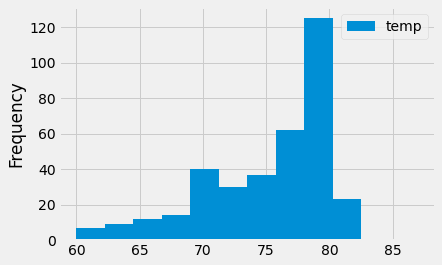

In [222]:
df_station.plot.hist(bins=12)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
